In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mall-cust-csv/Mall_Customers.pdf
/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


Data Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


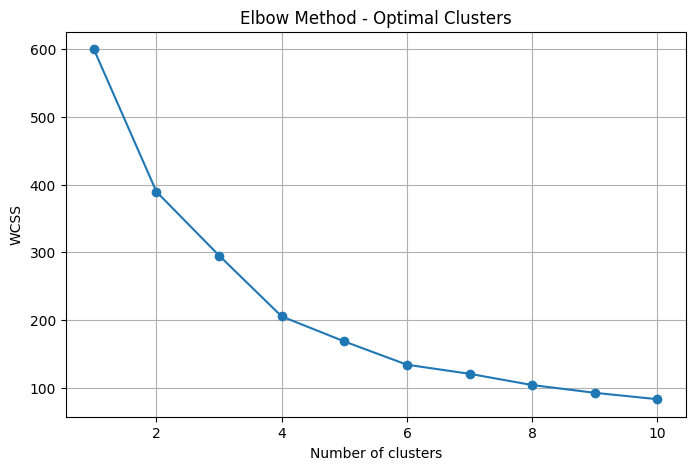

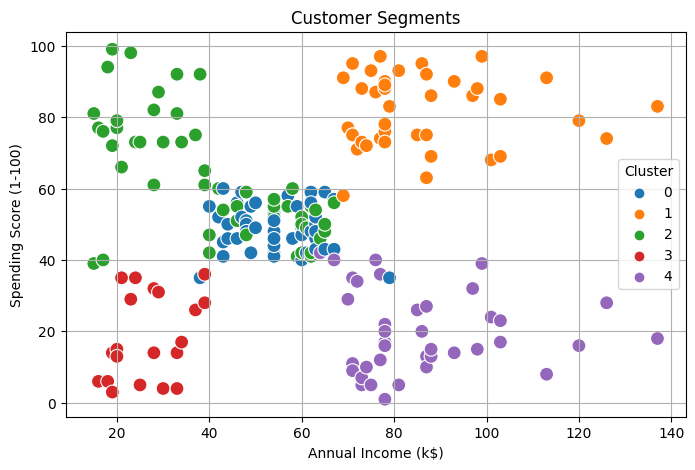

Clustered data saved as 'Mall_Customers_Clustered.csv'


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File '{file_path}' not found. Make sure it's in the working directory.")

df = pd.read_csv(file_path)

print("Data Preview:")
print(df.head())

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=df, palette='tab10', s=100
)
plt.title("Customer Segments")
plt.legend(title='Cluster')
plt.grid()
plt.show()

df.to_csv("/kaggle/working/Mall_Customers_Clustered.csv", index=False)
print("Clustered data saved as 'Mall_Customers_Clustered.csv'")
